<a href="https://colab.research.google.com/github/hwankang/hoggorm/blob/master/20(sun)_Nov_7_04_pm___C_NIR_not_complete_PLS_R2%3D_0_934_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Least Squares Regression (PLSR) on Raman data

This notebook illustrates how to use the **hoggorm** package to carry out partial least squares regression (PLSR) on multivariate data. Furthermore, we will learn how to visualise the results of the PLSR using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [ ]:
!wget https://github.com/olivertomic/hoggorm
!pip install hoggorm

--2022-11-20 09:00:43--  https://github.com/olivertomic/hoggorm
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘hoggorm’

hoggorm                 [ <=>                ] 225.74K  --.-KB/s    in 0.03s   

2022-11-20 09:00:43 (8.17 MB/s) - ‘hoggorm’ saved [231160]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.8 MB/s 


In [ ]:
!pip install hoggormplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#filename='/content/drive/MyDrive/machine_learning/123_Raman_DATA_csv.csv'
filename='/content/drive/MyDrive/machine_learning/C_NIR_DATA_csv.csv'
import pandas as pd
X2_df = pd.read_csv(filename,header=0,encoding="unicode-escape")
X2_df

Mounted at /content/drive


,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_C,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,13.7,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,2,True,13.7,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,3,True,13.7,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,4,True,14.0,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,5,True,14.0,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,592,True,32.4,0.135276,0.137610,0.140914,0.140053,0.136916,0.136157,0.137090,...,2.972613,2.971403,2.958870,2.953819,2.958890,2.961540,2.946616,2.937330,2.938951,2.940291
592,593,True,32.4,0.137936,0.140017,0.142949,0.142035,0.138991,0.138004,0.138435,...,2.943456,2.949011,2.942728,2.932982,2.932143,2.930411,2.918988,2.912270,2.914247,2.914833
593,594,True,32.1,0.155206,0.157314,0.160477,0.159783,0.156933,0.156270,0.157146,...,3.026505,3.024793,3.014496,3.004638,3.003242,2.996760,2.983829,2.973830,2.975724,2.970771
594,595,True,32.1,0.151214,0.153485,0.156378,0.155283,0.152194,0.151318,0.151877,...,3.008188,3.006203,2.995358,2.985339,2.987618,2.992405,2.987275,2.979156,2.979178,2.975309


In [ ]:
X3_df=X2_df.iloc[:,3:]
X3_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,0.275486,0.275550,0.274192,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,0.266783,0.266419,0.264946,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,0.256413,0.256452,0.255233,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,0.261908,0.261728,0.260385,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,0.256470,0.256531,0.254780,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.135276,0.137610,0.140914,0.140053,0.136916,0.136157,0.137090,0.135747,0.133233,0.133107,...,2.972613,2.971403,2.958870,2.953819,2.958890,2.961540,2.946616,2.937330,2.938951,2.940291
592,0.137936,0.140017,0.142949,0.142035,0.138991,0.138004,0.138435,0.136726,0.133999,0.133482,...,2.943456,2.949011,2.942728,2.932982,2.932143,2.930411,2.918988,2.912270,2.914247,2.914833
593,0.155206,0.157314,0.160477,0.159783,0.156933,0.156270,0.157146,0.155810,0.153363,0.153171,...,3.026505,3.024793,3.014496,3.004638,3.003242,2.996760,2.983829,2.973830,2.975724,2.970771
594,0.151214,0.153485,0.156378,0.155283,0.152194,0.151318,0.151877,0.150316,0.147899,0.147779,...,3.008188,3.006203,2.995358,2.985339,2.987618,2.992405,2.987275,2.979156,2.979178,2.975309


In [ ]:
int(X3_df.shape[0]*0.7), X3_df.shape[0]-int(X3_df.shape[0]*0.7)

(282, 122)

In [ ]:
#train_end=int(X3_df.shape[0]*0.7)
X_df_train =X3_df.iloc[119:,:]
X_df=X_df_train
X_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
119,0.262524,0.263562,0.264665,0.264319,0.263297,0.262703,0.262574,0.262632,0.262821,0.261458,...,2.980620,2.980740,2.967095,2.957169,2.958610,2.955143,2.940298,2.931317,2.935677,2.936687
120,0.293773,0.294302,0.294645,0.293907,0.293254,0.293222,0.293012,0.292412,0.292096,0.290701,...,2.966404,2.963615,2.953492,2.945536,2.947394,2.946853,2.933877,2.924689,2.924892,2.923960
121,0.291636,0.292338,0.293067,0.292458,0.291533,0.291363,0.291561,0.291483,0.291191,0.289440,...,2.959010,2.956308,2.944608,2.937388,2.940715,2.942777,2.932929,2.922374,2.923253,2.924440
122,0.343679,0.344910,0.346219,0.346030,0.345284,0.344953,0.344694,0.344184,0.343797,0.342145,...,2.981495,2.982364,2.973112,2.967579,2.974222,2.979318,2.971074,2.962638,2.963239,2.959745
123,0.286220,0.286962,0.287894,0.287638,0.286812,0.286409,0.286449,0.286558,0.286567,0.284961,...,2.962299,2.961570,2.952077,2.944810,2.944401,2.941859,2.929561,2.920783,2.921553,2.920206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.135276,0.137610,0.140914,0.140053,0.136916,0.136157,0.137090,0.135747,0.133233,0.133107,...,2.972613,2.971403,2.958870,2.953819,2.958890,2.961540,2.946616,2.937330,2.938951,2.940291
592,0.137936,0.140017,0.142949,0.142035,0.138991,0.138004,0.138435,0.136726,0.133999,0.133482,...,2.943456,2.949011,2.942728,2.932982,2.932143,2.930411,2.918988,2.912270,2.914247,2.914833
593,0.155206,0.157314,0.160477,0.159783,0.156933,0.156270,0.157146,0.155810,0.153363,0.153171,...,3.026505,3.024793,3.014496,3.004638,3.003242,2.996760,2.983829,2.973830,2.975724,2.970771
594,0.151214,0.153485,0.156378,0.155283,0.152194,0.151318,0.151877,0.150316,0.147899,0.147779,...,3.008188,3.006203,2.995358,2.985339,2.987618,2.992405,2.987275,2.979156,2.979178,2.975309


In [ ]:
X_df_test =X3_df.iloc[0:119,:]
X_df_test

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,0.275486,0.275550,0.274192,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,0.266783,0.266419,0.264946,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,0.256413,0.256452,0.255233,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,0.261908,0.261728,0.260385,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,0.256470,0.256531,0.254780,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.283230,0.284204,0.284944,0.284437,0.283752,0.283644,0.283607,0.283309,0.283026,0.281325,...,2.947243,2.945976,2.936784,2.927785,2.928515,2.928733,2.918996,2.912111,2.913308,2.913059
115,0.258526,0.259386,0.260173,0.259733,0.258837,0.258256,0.257899,0.257771,0.257977,0.256654,...,2.970328,2.969775,2.955248,2.943469,2.946586,2.947438,2.936673,2.926338,2.926575,2.923976
116,0.253916,0.254847,0.255695,0.255165,0.254392,0.254194,0.254069,0.253911,0.254308,0.253541,...,2.923201,2.923839,2.915851,2.909040,2.910677,2.911466,2.901450,2.890920,2.888401,2.883486
117,0.264387,0.265363,0.266743,0.266691,0.265985,0.265850,0.266009,0.265728,0.265162,0.263331,...,2.970924,2.972936,2.966272,2.958332,2.962695,2.964331,2.953248,2.942169,2.943951,2.940239


In [ ]:
Y3_df=X2_df.iloc[:,2:3]
Y3_df

,Y_C
0,13.7
1,13.7
2,13.7
3,14.0
4,14.0
...,...
591,32.4
592,32.4
593,32.1
594,32.1


In [ ]:
Y_df_target =Y3_df.iloc[119:,:]
Y_df=Y_df_target
Y_df

,Y_C
119,24.0
120,20.8
121,20.8
122,20.8
123,22.3
...,...
591,32.4
592,32.4
593,32.1
594,32.1


In [ ]:
Y_df_ground =Y3_df.iloc[0:119,:]
Y_df_true= Y_df_ground
Y_df_true

,Y_C
0,13.7
1,13.7
2,13.7
3,14.0
4,14.0
...,...
114,22.7
115,22.7
116,22.7
117,24.0


Next, load the data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

The ``nipalsPLS2`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frames holding the imported data need to be "taken apart" into three parts: 
* two numpy array holding the numeric values
* two Python list holding variable (column) names
* two Python list holding object (row) names. 

The numpy arrays with values will be used as input for the ``nipalsPLS2`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [ ]:
# Get the values from the data frame
X = X_df.values
Y = Y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
Y_varNames = list(Y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
Y_objNames = list(Y_df.index)

---

### Apply PLSR to our data

Now, let's run PLSR on the data using the ``nipalsPLS2`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/plsr.html). Using input paramter ``arrX`` and ``arrY`` we define which numpy array we would like to analyse. ``arrY`` is what typically is considered to be the response matrix, while the measurements are typically defined as ``arrX``. By setting input parameter ``Xstand=False`` and ``Ystand=False`` we make sure that the variables are only mean centered, not scaled to unit variance, if this is what you want. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PLS2 model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four components to be computed.

In [ ]:
model = ho.nipalsPLS2(arrX=X, Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=4)

loo


That's it, the PLS2 model has been computed. Now we would like to inspect the results by visualising them. We can do this using plotting functions of the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

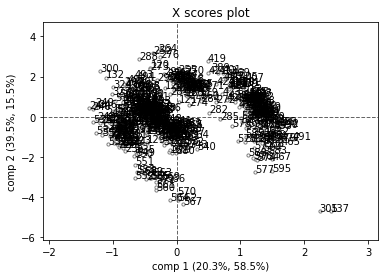

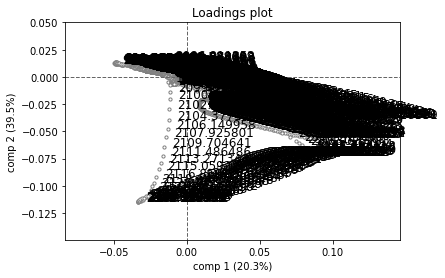

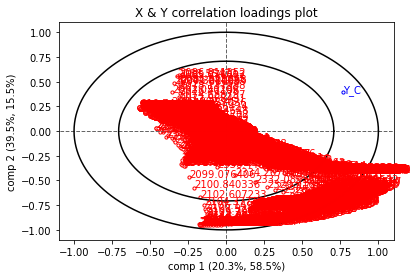

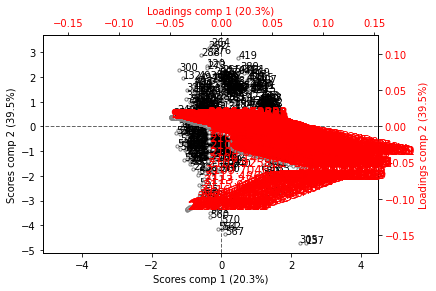

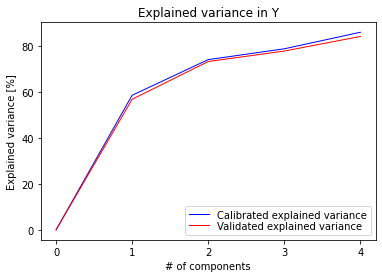

In [ ]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=X_objNames, 
         XvarNames=X_varNames,
         YvarNames=Y_varNames)

Plots can also be called separately.

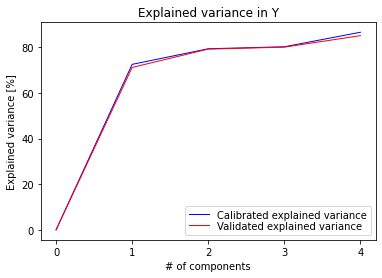

In [ ]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

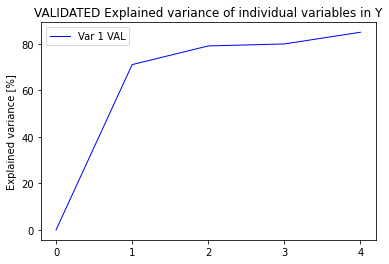

In [ ]:
# Plot cumulative validated explained variance for each variable in Y
hop.explainedVariance(model, individual = True)

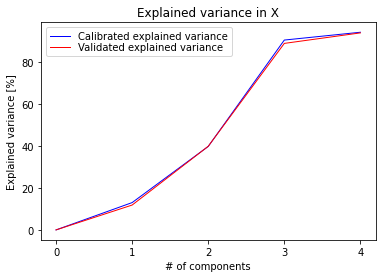

In [ ]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

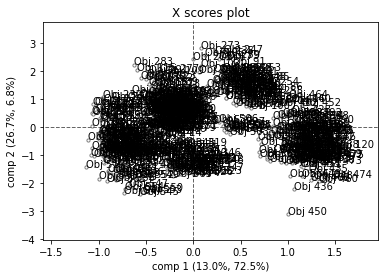

In [ ]:
hop.scores(model)

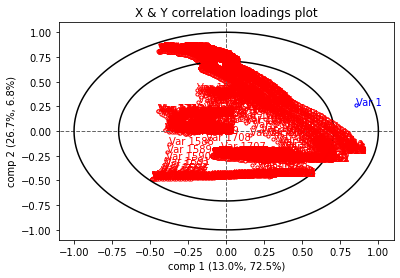

In [ ]:
hop.correlationLoadings(model)

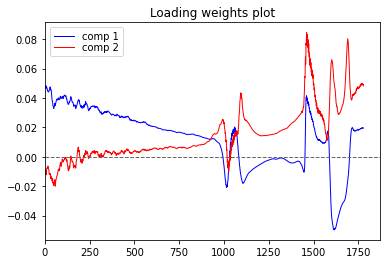

In [ ]:
# Plot X loadings in line plot
hop.loadings(model, weights=True, line=True)

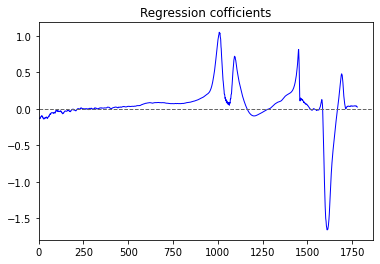

In [ ]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

---

### Accessing numerical results

Now that we have visualised the PLSR results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [ ]:
# Get X scores and store in numpy array
X_scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
X_scores_df = pd.DataFrame(model.X_scores())
X_scores_df.index = X_objNames
X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_scores().shape[1])]
X_scores_df

,comp 1,comp 2,comp 3,comp 4
18,-0.291432,0.306032,-0.002272,0.522850
19,-0.149548,0.205582,0.522799,0.267772
20,-0.288164,-0.112073,0.273276,0.539680
21,-0.444119,0.071162,-0.094303,0.390095
22,-0.455161,0.120746,0.337874,0.414591
...,...,...,...,...
591,0.936417,-0.681567,1.711876,0.401955
592,1.072940,-0.627378,0.989330,0.239927
593,0.886226,-0.072337,2.053361,1.028316
594,0.962072,-0.825626,2.584215,0.600085


In [ ]:
help(ho.nipalsPLS2.X_scores)

Help on function X_scores in module hoggorm.plsr2:

X_scores(self)
    Returns array holding scores of array X. First column holds scores
    for component 1, second column holds scores for component 2, etc.



In [ ]:
# Dimension of the X_scores
np.shape(model.X_scores())

(282, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [ ]:
# Get X loadings and store in numpy array
X_loadings = model.X_loadings()

# Get X loadings and store in pandas dataframe with row and column names
X_loadings_df = pd.DataFrame(model.X_loadings())
X_loadings_df.index = X_varNames
X_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_loadings_df

,comp 1,comp 2,comp 3,comp 4
899.9280058,-0.040769,0.050950,0.018025,-0.028449
900.2520706,-0.040826,0.050814,0.018109,-0.028171
900.5763689,-0.040690,0.050494,0.018287,-0.027917
900.9009009,-0.041142,0.050895,0.018753,-0.027768
901.2256669,-0.041889,0.051715,0.019310,-0.027726
...,...,...,...,...
2490.039841,-0.013590,0.001040,0.010820,0.043564
2492.522433,-0.013769,0.001257,0.011249,0.043037
2495.00998,-0.013502,0.001158,0.011303,0.043054
2497.502498,-0.013632,0.000995,0.011201,0.043854


In [ ]:
help(ho.nipalsPLS2.X_loadings)

Help on function X_loadings in module hoggorm.plsr2:

X_loadings(self)
    Returns array holding loadings of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [ ]:
np.shape(model.X_loadings())

(3326, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [ ]:
# Get Y loadings and store in numpy array
Y_loadings = model.Y_loadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_loadings_df = pd.DataFrame(model.Y_loadings())
Y_loadings_df.index = Y_varNames
Y_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_loadings_df

,comp 1,comp 2,comp 3,comp 4
Y_C,11.258641,2.34827,0.791212,6.008964


In [ ]:
# Get X correlation loadings and store in numpy array
X_corrloadings = model.X_corrLoadings()

# Get X correlation loadings and store in pandas dataframe with row and column names
X_corrloadings_df = pd.DataFrame(model.X_corrLoadings())
X_corrloadings_df.index = X_varNames
X_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
X_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
899.9280058,-0.440444,0.809580,0.303471,-0.170634
900.2520706,-0.441932,0.809033,0.305493,-0.169308
900.5763689,-0.442522,0.807696,0.309927,-0.168560
900.9009009,-0.442934,0.805908,0.314636,-0.165974
901.2256669,-0.442980,0.804377,0.318238,-0.162785
...,...,...,...,...
2490.039841,-0.372509,0.041929,0.462198,0.662946
2492.522433,-0.376400,0.050555,0.479253,0.653194
2495.00998,-0.370449,0.046718,0.483276,0.655823
2497.502498,-0.368740,0.039594,0.472178,0.658605


In [ ]:
help(ho.nipalsPLS2.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.plsr2:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get Y loadings and store in numpy array
Y_corrloadings = model.X_corrLoadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_corrloadings_df = pd.DataFrame(model.Y_corrLoadings())
Y_corrloadings_df.index = Y_varNames
Y_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_corrLoadings().shape[1])]
Y_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
Y_C,0.851341,0.261172,0.093237,0.252269


In [ ]:
help(ho.nipalsPLS2.Y_corrLoadings)

Help on function Y_corrLoadings in module hoggorm.plsr2:

Y_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in X
X_calExplVar = model.X_calExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_calExplVar_df = pd.DataFrame(model.X_calExplVar())
X_calExplVar_df.columns = ['calibrated explained variance in X']
X_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_calExplVar_df

,calibrated explained variance in X
comp 1,13.004800
comp 2,26.718893
comp 3,50.622812
comp 4,3.718884


In [ ]:
help(ho.nipalsPLS2.X_calExplVar)

Help on function X_calExplVar in module hoggorm.plsr2:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in Y
Y_calExplVar = model.Y_calExplVar()

# Get calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_calExplVar_df = pd.DataFrame(model.Y_calExplVar())
Y_calExplVar_df.columns = ['calibrated explained variance in Y']
Y_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_calExplVar_df

,calibrated explained variance in Y
comp 1,72.478192
comp 2,6.821059
comp 3,0.869316
comp 4,6.363961


In [ ]:
help(ho.nipalsPLS2.Y_calExplVar)

Help on function Y_calExplVar in module hoggorm.plsr2:

Y_calExplVar(self)
    Returns a list holding the calibrated explained variance for each
    component. First number in list is for component 1, second number for
    component 2, etc.



In [ ]:
# Get cumulative calibrated explained variance in X
X_cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance in X and store in pandas dataframe with row and column names
X_cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
X_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in X']
X_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_df

,cumulative calibrated explained variance in X
comp 0,0.000000
comp 1,13.004800
comp 2,39.723693
comp 3,90.346506
comp 4,94.065389


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.plsr2:

X_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component.



In [ ]:
# Get cumulative calibrated explained variance in Y
Y_cumCalExplVar = model.Y_cumCalExplVar()

# Get cumulative calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_df = pd.DataFrame(model.Y_cumCalExplVar())
Y_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in Y']
Y_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_df

,cumulative calibrated explained variance in Y
comp 0,0.000000
comp 1,72.478192
comp 2,79.299251
comp 3,80.168567
comp 4,86.532528


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar)

Help on function Y_cumCalExplVar in module hoggorm.plsr2:

Y_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative calibrated explained variance for each variable in X
X_cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in X and store in pandas dataframe with row and column names
X_cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
X_cumCalExplVar_ind_df.columns = X_varNames
X_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_ind_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
comp 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comp 1,19.399049,19.530406,19.582543,19.619054,19.623133,19.326914,18.735861,18.419185,18.742507,19.356625,...,12.353594,12.337684,12.261761,12.440254,13.377334,13.876267,14.167689,13.723228,13.596893,13.863690
comp 2,84.941092,84.983861,84.819861,84.567799,84.325387,83.960105,83.408946,83.055033,83.370697,84.100438,...,12.406488,12.414200,12.383992,12.551002,13.471252,14.052075,14.423266,13.941482,13.753660,14.094457
comp 3,94.150555,94.316434,94.425345,94.467367,94.452931,94.339522,94.082766,93.797172,93.821721,94.192726,...,32.406861,32.836081,34.043901,34.306073,34.267081,35.414792,37.391643,37.297031,36.048842,36.328628
comp 4,97.062135,97.182948,97.266604,97.222115,97.102823,96.979017,96.798740,96.561671,96.552804,96.887823,...,76.491891,77.036014,77.929306,78.758423,78.978648,79.364488,80.057935,80.307450,79.424924,78.281154


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.plsr2:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get cumulative calibrated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_ind_df = pd.DataFrame(model.Y_cumCalExplVar_indVar())
Y_cumCalExplVar_ind_df.columns = Y_varNames
Y_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_ind_df

,Y_C
comp 0,0.000000
comp 1,72.478192
comp 2,79.299251
comp 3,80.168567
comp 4,86.532528


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar_indVar)

Help on function Y_cumCalExplVar_indVar in module hoggorm.plsr2:

Y_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in Y after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 1 component
Y_from_1_component = model.Y_predCal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_df = pd.DataFrame(model.Y_predCal()[1])
Y_from_1_component_df.index = Y_objNames
Y_from_1_component_df.columns = Y_varNames
Y_from_1_component_df

,Y_C
18,11.646341
19,13.243769
20,11.683143
21,9.927302
22,9.802984
...,...
591,25.470258
592,27.007317
593,24.905177
594,25.759093


In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 4 component
Y_from_4_component = model.Y_predCal()[4]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_4_component_df = pd.DataFrame(model.Y_predCal()[4])
Y_from_4_component_df.index = Y_objNames
Y_from_4_component_df.columns = Y_varNames
Y_from_4_component_df

,Y_C
18,15.504977
19,15.749208
20,14.879103
21,12.363866
22,12.845120
...,...
591,27.639542
592,27.758545
593,32.539069
594,29.470850


In [ ]:
help(ho.nipalsPLS2.X_predCal)

Help on function X_predCal in module hoggorm.plsr2:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [ ]:
# Get validated explained variance of each component X
X_valExplVar = model.X_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_valExplVar_df = pd.DataFrame(model.X_valExplVar())
X_valExplVar_df.columns = ['validated explained variance in X']
X_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_valExplVar_df

,validated explained variance in X
comp 1,11.832033
comp 2,27.964201
comp 3,48.962026
comp 4,4.999621


In [ ]:
help(ho.nipalsPLS2.X_valExplVar)

Help on function X_valExplVar in module hoggorm.plsr2:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get validated explained variance of each component Y
Y_valExplVar = model.Y_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
Y_valExplVar_df = pd.DataFrame(model.Y_valExplVar())
Y_valExplVar_df.columns = ['validated explained variance in Y']
Y_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_valExplVar_df

,validated explained variance in Y
comp 1,71.119848
comp 2,8.035960
comp 3,0.848296
comp 4,5.040795


In [ ]:
help(ho.nipalsPLS2.Y_valExplVar)

Help on function Y_valExplVar in module hoggorm.plsr2:

Y_valExplVar(self)
    Returns a list holding the validated explained variance for Y after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get cumulative validated explained variance in X
X_cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance in X and store in pandas dataframe with row and column names
X_cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
X_cumValExplVar_df.columns = ['cumulative validated explained variance in X']
X_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumValExplVar_df

,cumulative validated explained variance in X
comp 0,0.000000
comp 1,11.832033
comp 2,39.796234
comp 3,88.758260
comp 4,93.757881


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.plsr2:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance in Y
Y_cumValExplVar = model.Y_cumValExplVar()

# Get cumulative validated explained variance in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_df = pd.DataFrame(model.Y_cumValExplVar())
Y_cumValExplVar_df.columns = ['cumulative validated explained variance in Y']
Y_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_df

,cumulative validated explained variance in Y
comp 0,0.000000
comp 1,71.119848
comp 2,79.155809
comp 3,80.004105
comp 4,85.044900


In [ ]:
help(ho.nipalsPLS2.Y_cumValExplVar)

Help on function Y_cumValExplVar in module hoggorm.plsr2:

Y_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_ind_df = pd.DataFrame(model.Y_cumValExplVar_indVar())
Y_cumValExplVar_ind_df.columns = Y_varNames
Y_cumValExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_ind_df

,Y_C
comp 0,0.000000
comp 1,71.119848
comp 2,79.155809
comp 3,80.004105
comp 4,85.044900


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.plsr2:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 1 component
Y_from_1_component_val = model.Y_predVal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_val_df = pd.DataFrame(model.Y_predVal()[1])
Y_from_1_component_val_df.index = Y_objNames
Y_from_1_component_val_df.columns = Y_varNames
Y_from_1_component_val_df

,Y_C
18,11.639105
19,13.240186
20,11.676051
21,9.924754
22,9.798864
...,...
591,25.077998
592,26.820337
593,24.559301
594,24.992193


In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 3 components
Y_from_3_component_val = model.Y_predVal()[3]

# Predicted Y from calibration using 3 components stored in pandas data frame with row and columns names
Y_from_3_component_val_df = pd.DataFrame(model.Y_predVal()[3])
Y_from_3_component_val_df.index = Y_objNames
Y_from_3_component_val_df.columns = Y_varNames
Y_from_3_component_val_df

,Y_C
18,12.354675
19,14.136752
20,11.624026
21,10.015199
22,10.348769
...,...
591,26.279018
592,26.546013
593,27.339595
594,30.352280


In [ ]:
help(ho.nipalsPLS2.Y_predVal)

Help on function Y_predVal in module hoggorm.plsr2:

Y_predVal(self)
    Returns dictionary holding arrays of predicted Yhat after each
    component from validation. Dictionary key represents order of
    component.



In [ ]:
new_X =X_df_test
# Now insert the new data into the existing model and compute scores for two components (numComp=2)
#pred_X_scores = model.X_scores_predict(new_X, numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=4)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=4))
pred_X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(4)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,comp 1,comp 2,comp 3,comp 4
new object 1,-0.677517,1.018945,0.559158,0.005165
new object 2,-0.540570,0.551435,0.642234,0.045141
new object 3,-0.386692,-0.124169,0.584882,0.061709
new object 4,-0.466999,0.444978,0.577700,-0.088448
new object 5,-0.437899,0.117666,0.533743,0.136984
...,...,...,...,...
new object 115,0.583448,-0.233748,2.102391,-0.373126
new object 116,0.303940,0.595398,1.199336,-0.094857
new object 117,0.532158,0.345526,1.553212,-0.356012
new object 118,0.743048,-0.636299,2.488320,-0.019643


In [ ]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_X = X[0:4, :] + npr.rand(4, np.shape(X)[1])
np.shape(X)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=2))
pred_X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(2)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,comp 1,comp 2
new object 1,-1.355751e+07,1.843445e+06
new object 2,-1.047197e+07,9.677824e+05
new object 3,-8.587680e+06,-1.431813e+06
new object 4,-5.483254e+06,-1.683232e+06


In [ ]:
help(ho.nipalsPLS2.X_scores_predict)

Help on function X_scores_predict in module hoggorm.plsr2:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.



In [ ]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=4)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=4))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Y_C
new object 1,12.985005
new object 2,13.345639
new object 3,12.779502
new object 4,12.370627
new object 5,13.643349
...,...
new object 115,20.037984
new object 116,20.990908
new object 117,20.552630
new object 118,24.197549


In [ ]:
Y_df_true

,Y_C
0,13.7
1,13.7
2,13.7
3,14.0
4,14.0
...,...
114,22.7
115,22.7
116,22.7
117,24.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(Y_df_true, pred_Y_df)
rmse=np.sqrt(mse)
r2=r2_score(Y_df_true, pred_Y_df)

In [ ]:
rmse,r2

(1.8777035949522658, 0.9342505618253352)

In [ ]:
print('MSE : {: 0.3f}, || RMSE : {: 0.3f}, || R2 : {: 0.3f}'.format(mse,rmse,r2))

MSE :  3.526, || RMSE :  1.878, || R2 :  0.934


Text(0, 0.5, 'Predicted value')

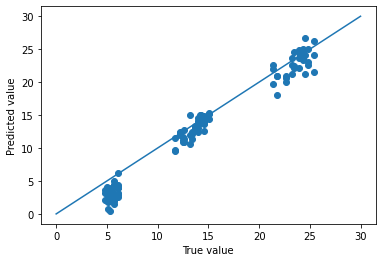

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Y_df_true.values,pred_Y_df.values)
plt.plot([0,30],[0,30])
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [ ]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=2)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=2))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Y_1,Y_2,Y_3
new object 1,-0.278081,0.687204,0.409876
new object 2,0.613083,1.888560,2.503320
new object 3,0.029442,2.708414,2.741955
new object 4,1.306844,3.888017,5.199261
